In [1]:
import networkx as nx
import pandas as pd

In [16]:
users = pd.read_csv('../userbase_builder/users.csv')

In [17]:
ts_connection = pd.read_csv('../userbase_builder/teacher_student_connections.csv')

source_col = 'user_id_teacher'
target_col = 'user_id_student'
edge_col = 'teaching'

G = nx.from_pandas_edgelist(ts_connection, source=source_col, target=target_col, edge_attr=edge_col, create_using=nx.DiGraph)

In [4]:
nx.from_pandas_edgelist?

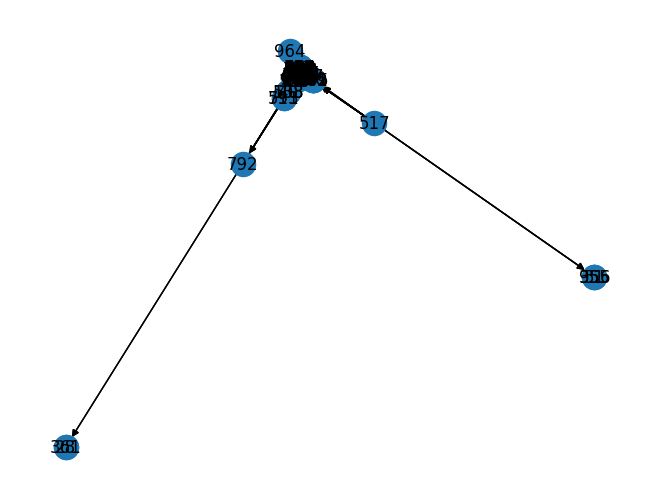

In [6]:
nx.draw_spectral(G, with_labels=True)

In [7]:
G.number_of_edges()

9161

In [9]:
G.number_of_nodes()

759

In [8]:
for edge in G.edges(data=True):
    print(edge)

(0, 40, {'teaching': 'history'})
(0, 96, {'teaching': 'history'})
(0, 118, {'teaching': 'history'})
(0, 144, {'teaching': 'history'})
(40, 18, {'teaching': 'Romanian language'})
(40, 123, {'teaching': 'Romanian language'})
(118, 34, {'teaching': 'biology'})
(118, 54, {'teaching': 'biology'})
(118, 77, {'teaching': 'biology'})
(118, 138, {'teaching': 'biology'})
(25, 40, {'teaching': 'history'})
(25, 96, {'teaching': 'history'})
(25, 118, {'teaching': 'history'})
(25, 144, {'teaching': 'history'})
(68, 40, {'teaching': 'history'})
(68, 96, {'teaching': 'history'})
(68, 118, {'teaching': 'history'})
(68, 144, {'teaching': 'history'})
(138, 40, {'teaching': 'history'})
(138, 96, {'teaching': 'history'})
(138, 118, {'teaching': 'history'})
(138, 144, {'teaching': 'history'})
(140, 40, {'teaching': 'history'})
(140, 96, {'teaching': 'history'})
(140, 118, {'teaching': 'history'})
(140, 144, {'teaching': 'history'})
(143, 40, {'teaching': 'history'})
(143, 96, {'teaching': 'history'})
(143, 

In [10]:
for n in range(0, 150):
    try: 
        print(nx.find_cycle(G, source=n))
    except:
        print('No cycles')

No cycles
No cycles
No cycles
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
No cycles
No cycles
[(53, 72), (72, 53)]
No cycles
[(72, 53), (53, 72)]
No cycles
[(72, 53), (53, 72)]
No cycles
[(53, 72), (72, 53)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
No cycles
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
No cycles
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
No cycles
[(53, 72), (72, 53)]
No cycles
No cycles
[(72, 53), (53, 72)]
No cycles
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(53, 72), (72, 53)]
No cycles
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
[(53, 72), (72, 53)]
[(72, 53), (53, 72)]
[(72, 53), (53, 72)]
No cycles
No cycles
No cycles
[(72, 53), (53, 72)]
[(53, 72), (72, 53)]
[(72, 53), (53, 72)]
[(53, 72), (72, 53)]
[(72, 53), (53, 72)]
[

In [10]:
print(nx.find_cycle(G, source=30))

[(43, 48), (48, 64), (64, 73), (73, 43)]


In [11]:
try: 
    nx.find_cycle(G, source=30)
except:
    print('No cycles')

In [22]:
for i, x in enumerate(list(nx.simple_cycles(G, length_bound=3))[:100]):
    print(i, x, sum([users[users['user_id'] == y]['rating_avg'].values[0] for y in x]))

0 [3, 968, 431] 5.6
1 [3, 990, 431] 6.8999999999999995
2 [521, 421, 137] 6.4
3 [16, 421, 701] 9.3
4 [16, 804, 172] 11.0
5 [16, 804, 696] 12.5
6 [27, 81, 568] 8.3
7 [27, 421] 6.0
8 [53, 72] 3.6
9 [53, 112] 3.8
10 [53, 113, 305] 5.8
11 [53, 170, 338] 7.6000000000000005
12 [53, 170, 608] 6.800000000000001
13 [53, 170, 960] 7.9
14 [53, 191] 5.800000000000001
15 [53, 262, 305] 4.2
16 [53, 656, 91] 8.5
17 [53, 656, 290] 6.500000000000001
18 [568, 317, 170] 8.7
19 [568, 495, 450] 7.8
20 [568, 819, 81] 7.3
21 [57, 91, 237] 8.8
22 [57, 91, 466] 10.2
23 [57, 290, 237] 6.800000000000001
24 [57, 290, 466] 8.2
25 [582, 656, 705] 6.800000000000001
26 [586, 705, 765] 7.2
27 [586, 804, 879] 8.9
28 [75, 297, 656] 8.0
29 [75, 660, 205] 5.5
30 [75, 667, 209] 8.9
31 [75, 667, 215] 7.0
32 [75, 667, 284] 9.600000000000001
33 [75, 667, 872] 9.100000000000001
34 [589, 660] 3.4
35 [79, 81, 654] 8.0
36 [79, 376, 118] 7.6
37 [79, 396] 5.1
38 [79, 804, 676] 11.8
39 [81, 209] 6.0
40 [81, 215] 4.1
41 [81, 284] 6.7


In [20]:
users[users['user_id'] == 656]['rating_avg'].values[0]

np.float64(2.7)